In [30]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

### Finding the minmum of  $Y = X^4 - 5X$

In [2]:
# Create scalar optimization variable
x = cp.Variable()

# define the objective function
obj = cp.Minimize((x)**4 - 5*x)

# Form and solve problem
prob = cp.Problem(obj)
prob.solve()  # Returns the optimal value
x_opt = x.value
y_opt = prob.value

print("status:", prob.status)
print("optimal X :", x.value)
print("optimal Y :", prob.value)

status: optimal
optimal X : 1.0772400449420363
optimal Y : -4.039565040222109


#### Plot the results

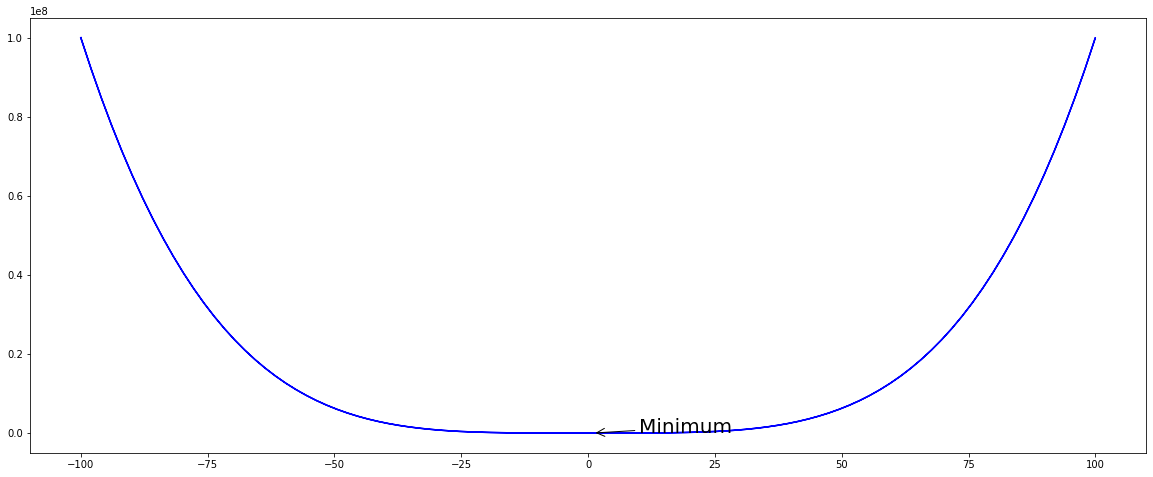

In [3]:
# define x, y
x = np.linspace(-100, 100, 100)
y = (x)**4 - 5*x

T = np.block([[x, x[::-1]],
              [y, y[::-1]]])

fig, axs = plt.subplots(figsize=(20, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=.1)
axs.plot(T[0,:], T[1,:],'b')
axs.annotate("Minimum", xy=(x_opt, y_opt), xytext=(10, 10),
            arrowprops=dict(arrowstyle="->"), fontsize=20);

### Finding the Maximum of  $Z = exp(X_{1}^2 + X_{2}^2)$

In [104]:
# Create scalar optimization variable
X1 = cp.Variable()
X2 = cp.Variable()


# define the objective function
obj = cp.Minimize(cp.exp(X1**2 + X2**2))

# Form and solve problem
prob = cp.Problem(obj)
prob.solve()  # Returns the optimal value
x_opt = [X1.value, X2.value]
y_opt = prob.value

print("status:", prob.status)
print("optimal X :", x_opt)
print("optimal Y :", y_opt)

status: optimal
optimal X : [array(0.), array(0.)]
optimal Y : 1.0


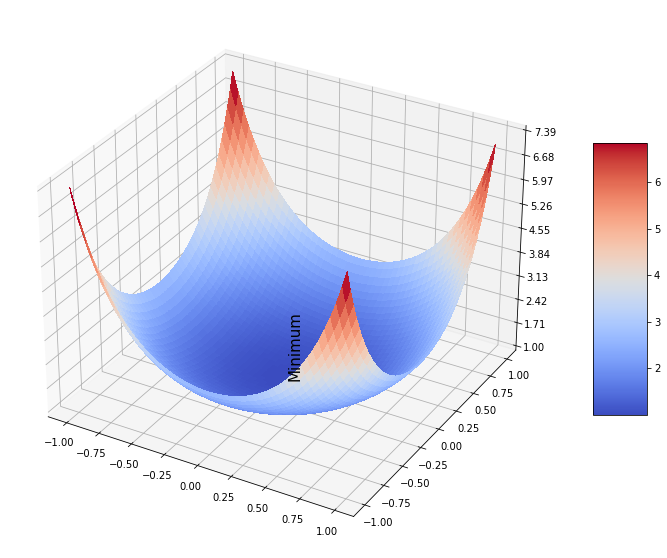

In [145]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={"projection": "3d"})

# Make data.
X1 = np.arange(-1, 1, 0.01)
X2 = np.arange(-1, 1, 0.01)
X1, X2 = np.meshgrid(X1, X2)
Z = np.exp(X1**2 + X2**2)

surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.text(x_opt[0], x_opt[1], y_opt,'Minimum', 'z', fontsize=15)
# ax.annotate("Minimum", xy=(-0, -0.001), xytext=(-0.02, -0.02),
#             arrowprops=dict(arrowstyle="->"), fontsize=20);
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()